# Preprocessing, Group Evaluation, Hyperparameter Optimization and Gradient Descent

## Preprocessing

### Example ordinal vs categorical

Given the house prices dataset from the first regression example in an earlier exercise:

1. Give some example features for the four different data types from the lecture. 
2. Name at least two issues in this dataset and two others that could occur when training a model.
3. Assume that you are given the postal code of a house - what other features could you add to the data based on that? Why do you think I ask this question?

In [3]:
import pandas as pd

data_houses = pd.read_csv(
    "exercise_02_train.csv", 
    index_col="Id")

for c in data_houses.columns:
    f = data_houses[c]
    print("--------")
    print(c)
    n_unique = f.nunique()
    print("  * unique:", n_unique)
    print("  * NAs:   ", f.isna().sum())
    if (n_unique < 10):
        print("  * values:", f.unique())
    

--------
MSSubClass
  * unique: 15
  * NAs:    0
--------
MSZoning
  * unique: 5
  * NAs:    0
  * values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
--------
LotFrontage
  * unique: 110
  * NAs:    259
--------
LotArea
  * unique: 1073
  * NAs:    0
--------
Street
  * unique: 2
  * NAs:    0
  * values: ['Pave' 'Grvl']
--------
Alley
  * unique: 2
  * NAs:    1369
  * values: [nan 'Grvl' 'Pave']
--------
LotShape
  * unique: 4
  * NAs:    0
  * values: ['Reg' 'IR1' 'IR2' 'IR3']
--------
LandContour
  * unique: 4
  * NAs:    0
  * values: ['Lvl' 'Bnk' 'Low' 'HLS']
--------
Utilities
  * unique: 2
  * NAs:    0
  * values: ['AllPub' 'NoSeWa']
--------
LotConfig
  * unique: 5
  * NAs:    0
  * values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
--------
LandSlope
  * unique: 3
  * NAs:    0
  * values: ['Gtl' 'Mod' 'Sev']
--------
Neighborhood
  * unique: 25
  * NAs:    0
--------
Condition1
  * unique: 9
  * NAs:    0
  * values: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
-

## Evaluation: Groups

1. Let's consider a cancer dataset. The goal is to predict the progression of the cancer (e.g., stage 1, stage 2, ...). Each patient appears multiple times in the dataset. Can you randomly split the data into train and test set?
2. Read the [documentation of `GroupShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html). What does it do? Explain what the `groups` parameter of the split method is used for!
3. Apply `GroupShuffleSplit` on the data below and examine the results. The [documentation of `GroupShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) also provides an example.
4. Also have a look around the different [splitting strategies provided by `scikit-learn`](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#visualize-cross-validation-indices-for-many-cv-objects).

In [ ]:
# code to generate data (skip this)
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

# Generate the class/group data
n_points = 20
X = rng.randn(n_points, 3)

y = rng.choice([0,1], n_points)

# Generate 10 uneven groups
# draw a prior for the likelihood of each group from the Dirichlet Distribution
# given that we observed elements of each group alpha_i - 1 time (here, alpha_i = 2)
group_prior = rng.dirichlet([2] * 10)
# assign a group [0,...,9] to each of the 20 points
groups = np.repeat(np.arange(10), rng.multinomial(n_points, group_prior))

In [ ]:
from sklearn.model_selection import GroupShuffleSplit

# Task 3: use X, y, groups and apply GroupShuffleSplit
X, y, groups
X, y, groups

## Hyperparameter Optimization

1. What is the difference between parameters and hyperparameters of a model? Give examples!
2. What is hyperparameter optimization?
3. Name two methods for hyperparameter optimization and compare them.

For the following dataset, we report the mean absolute error for a `DecisionTreeRegressor` using 10-fold cross validation via the function `cross_val_score`. The function's parameters `cv` and `scoring` are used to set the number of cross validation splits and the validation metric (e.g. `neg_mean_absolute_error`).

Aftwerwards we use `GridSearchCV` to optimize the `max_depth` parameter in the range of 1,2,3,4 and 5 for a `DecisionTreeRegressor` and report the same score. For this, we run `GridSearchCV` with a 10-fold cross-valiation. Note the `cv` and `param_grid` parameters of `GridSearchCV`.

4. What do you think the notion of *"nested cross-validation"*, *"inner cross-validation"* and *"outer cross-validation* refer to in this example?  

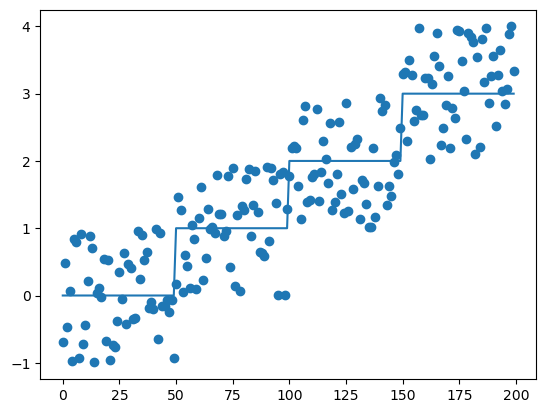

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error

# generate X and y
np.random.seed(12)
n_steps = 4
X = np.arange(50 * n_steps).reshape((-1,1))
y_orig = np.repeat(np.arange(4), int(X.shape[0] / n_steps))
y = y_orig + (np.random.random(y_orig.size) - 0.5) * 2

# plot data
plt.scatter(X, y)
plt.plot(X, y_orig)

In [ ]:
# normal model
model = DecisionTreeRegressor(max_depth=None)
results = cross_val_score(model, X, y, cv=10, scoring="neg_mean_absolute_error")

print(f"MAE: {abs(results.mean()):.3f} +/- {results.std():.3f}")

MAE: 0.648 +/- 0.145


In [9]:
# hyper parameter optimization

grid_params = {"max_depth": [1,2,3,4]}
model = GridSearchCV(DecisionTreeRegressor(), cv=10, param_grid=grid_params)
results = cross_val_score(model, X, y, cv=10, scoring="neg_mean_absolute_error")

print(f"MAE: {abs(results.mean()):.3f} +/- {results.std():.3f}")

MAE: 0.556 +/- 0.066


## Gradient Descent

### Learning Rate

1. Explain the tradeoff between different sizes of learning rate.

### Ice Cream Example

You are given a dataset with features $x$ (temperature in degree Celsius) and target $y$ (kg of ice cream sold):
$\begin{aligned}
x &= (20, 5, 15, 30)^T\\
y &= (40, 10, 30, 60)^T
\end{aligned}$

1. Define the objective for a linear regression model to predict the sold ice cream from the temperature data.
2. Compute the gradients of the objective with respect to the parameters of the linear regression model and do one step of gradient descent with learning rate of $2.5 \cdot 10^{-4}$. The initial parameters are $\boldsymbol\beta = (0, 1)^T$.
3. Assume the final parameters are $\boldsymbol\beta = (0, 2)^T$. What is the interpretation of these values?
4. Now, another column is added to the data, that denotes the weather (rainy/foggy/cloudy/sunny). How could you present the model this data?
5. What is a reason, that you might want to use SGD instead of the closed form solution to compute the parameters of a linear regression?

### Deriving Gradients

1. Do two steps to maximize the following function $f$ via gradient descent. Initial input values are $(x^{(0)}, y^{(0)}) = (1, 0)$. The learning rate equals $1$.
$f(x,y) = x^2 + e^{-xy^2}$